In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [166]:
data = pd.read_csv('pos_neg.csv')
data.head()

,review,sentiment
0,"b""I went and saw this movie last night after b...",pos
1,b'Actor turned director Bill Paxton follows up...,pos
2,b'As a recreational golfer with some knowledge...,pos
3,"b""I saw this film in a sneak preview, and it i...",pos
4,b'Bill Paxton has taken the true story of the ...,pos


In [167]:
data = shuffle(data)
data.head()

,review,sentiment
38660,"b""Shown in Australia as 'Hydrosphere', this in...",neg
1750,b'Once again Almen\xc3\xa1bar has provided us ...,pos
44874,"b""There's a good movie lurking here, but this ...",neg
31702,"b'""The Straight Story"" is a truly beautiful mo...",pos
20110,"b""I thought maybe... maybe this could be good....",neg


In [168]:
data['length'] = data['review'].apply(len)
data.head()

,review,sentiment,length
38660,"b""Shown in Australia as 'Hydrosphere', this in...",neg,704
1750,b'Once again Almen\xc3\xa1bar has provided us ...,pos,1565
44874,"b""There's a good movie lurking here, but this ...",neg,2107
31702,"b'""The Straight Story"" is a truly beautiful mo...",pos,648
20110,"b""I thought maybe... maybe this could be good....",neg,1103


In [169]:
data.shape

(50000, 3)

In [170]:
data.groupby('sentiment').describe()

length                                                        \
             count        mean          std   min    25%    50%      75%   
sentiment                                                                  
neg        25000.0  1301.78492   950.986519  35.0  710.0  979.0  1576.00   
pos        25000.0  1332.22784  1036.781470  68.0  695.0  973.5  1622.25   

                    
               max  
sentiment           
neg         9002.0  
pos        13741.0

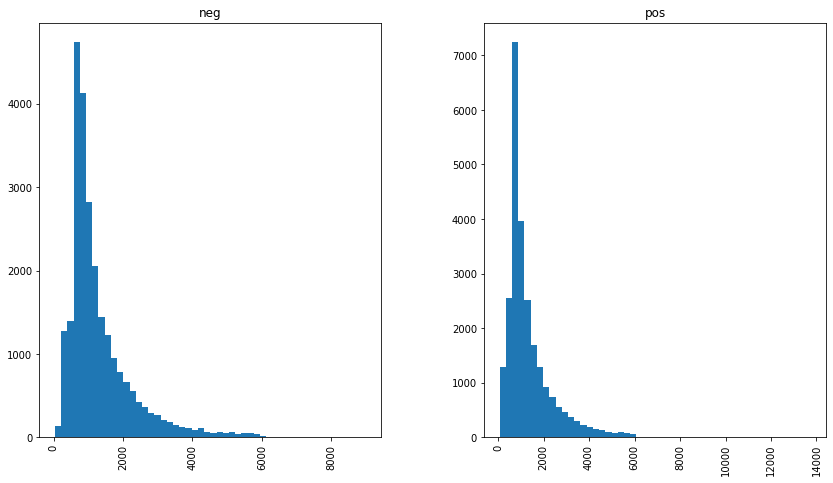

In [171]:
data.hist(column='length',by='sentiment', bins =50, figsize=(13.66,7.68))
plt.show()

In [172]:
stop_words = stopwords.words('english')
stop_words.append('movie')
def clean_data(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)',text)
    text = (re.sub('[\W]+', ' ', text.lower()) +' '.join(emoticons).replace('-', ''))
    rm_words = [w for w in text.split() if w.lower() not in stop_words]
    return ' '.join(rm_words)
    return text
clean_data('hello john!-;/.,<>? how are you.. @#$%^&*I am fine movie:')

'hello john fine'

In [173]:
data.head()

,review,sentiment,length
38660,"b""Shown in Australia as 'Hydrosphere', this in...",neg,704
1750,b'Once again Almen\xc3\xa1bar has provided us ...,pos,1565
44874,"b""There's a good movie lurking here, but this ...",neg,2107
31702,"b'""The Straight Story"" is a truly beautiful mo...",pos,648
20110,"b""I thought maybe... maybe this could be good....",neg,1103


In [174]:
data['review'] = data['review'].apply(clean_data)

In [175]:
data.head()

,review,sentiment,length
38660,b shown australia hydrosphere incredibly bad b...,neg,704
1750,b almen xc3 xa1bar provided us top quality fil...,pos,1565
44874,b good lurking basic idea good explore moral i...,neg,2107
31702,b straight story truly beautiful elderly man n...,pos,648
20110,b thought maybe maybe could good early appeara...,neg,1103


In [176]:
data.shape

(50000, 3)

In [177]:
bag_of_words = CountVectorizer()
bag_of_words.fit(data.review)
bag_of_words.vocabulary_

{'shown': 82445,
 'australia': 7228,
 'hydrosphere': 44444,
 'incredibly': 45698,
 'bad': 7867,
 'become': 9260,
 'hypnotised': 44514,
 'watch': 99585,
 'end': 29992,
 'see': 80677,
 'could': 21007,
 'get': 37562,
 'worse': 101627,
 'storyline': 87296,
 'predictable': 71056,
 'seems': 80714,
 'written': 101815,
 'high': 42574,
 'school': 79914,
 'dramatics': 27566,
 'class': 17924,
 'sets': 81290,
 'pathetic': 67404,
 'marginally': 56504,
 'better': 10122,
 'miniatures': 59281,
 'acting': 2478,
 'wooden': 101403,
 'infant': 46012,
 'muppet': 61484,
 'stolen': 87163,
 'props': 72005,
 'cupboard': 22282,
 'total': 93040,
 'recall': 74433,
 'seem': 80704,
 'single': 83104,
 'original': 65456,
 'idea': 44677,
 'whole': 100539,
 'found': 35337,
 'laughed': 52350,
 'way': 99718,
 'malcolm': 55873,
 'mcdowell': 57506,
 'hang': 40933,
 'head': 41630,
 'shame': 81606,
 'obviously': 64404,
 'needed': 62509,
 'money': 60217,
 'almen': 4060,
 'xc3': 103418,
 'xa1bar': 102668,
 'provided': 72150,
 

In [178]:
len(bag_of_words.vocabulary_)

104717

In [179]:
txt_transform = bag_of_words.transform(data['review'])
txt_transform.shape

(50000, 104717)

In [180]:
txt_transform_train, txt_transform_test = txt_transform[25000:], txt_transform[:25000]
sentiment_train, sentiment_test = data['sentiment'].iloc[25000:], data['sentiment'].iloc[:25000]

In [181]:
mn = MultinomialNB()
mn.fit(txt_transform_train,sentiment_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [182]:
mn.score(txt_transform_train, sentiment_train)

0.9166

In [183]:
mn.score(txt_transform_test, sentiment_test)

0.8584

In [184]:
def predict_review(text):
    test = bag_of_words.transform([text])
    return(mn.predict(test)[0])

In [190]:
new_review = data.iloc[1][0]
new_review

'b almen xc3 xa1bar provided us top quality film director amazing proven equally talented effective crossing genres excellent character development dialogue personality quirks subtle details well ramon father gaze allows audience identify protagonists closely making importance emotional impact events take place profound visuals times simple times stunning dream beach think almen xc3 xa1bar films really benefit fact also composes music matched film varying moods flawlessly film euthanasia important issue film tackles duality man times genuinely seems enjoy life albeit quite limited way yet one unswerving desire die overwhelming sadness film punctuated well timed quips humor seem funnier provide welcome respite melancholy certainly feel although clearly favor euthanasia film excellent job representing myriad points view ramon friends family poignant ramon father said despondent one thing worse losing child child wants die excellent writing acting directing cinematography music 10 10'

In [194]:
result = predict_review(new_review)
if(result == 'pos'):
    print('you gave positive Review')
else:
    print('you gave negative Review')

you gave positive Review


In [102]:
'''# Text to Speech
import pyttsx3
engine = pyttsx3.init()
engine.setProperty('rate', 90)

voices = engine.getProperty('voices')
for voice in voices:
    print("Using voice:", repr(voice))
    engine.setProperty('voice', voice.id)
    engine.say("Hi there, how's you ?")
    engine.say("A B C D E F G H I J K L M")
    engine.say("N O P Q R S T U V W X Y Z")
    engine.say("0 1 2 3 4 5 6 7 8 9")
    engine.say("Sunday Monday Tuesday Wednesday Thursday Friday Saturday")
    engine.say("Violet Indigo Blue Green Yellow Orange Red")
    engine.say("Apple Banana Cherry Date Guava")
engine.runAndWait()
engine.stop()'''

'# Text to Speech\nimport pyttsx3\nengine = pyttsx3.init()\nengine.setProperty(\'rate\', 90)\n\nvoices = engine.getProperty(\'voices\')\nfor voice in voices:\n    print("Using voice:", repr(voice))\n    engine.setProperty(\'voice\', voice.id)\n    engine.say("Hi there, how\'s you ?")\n    engine.say("A B C D E F G H I J K L M")\n    engine.say("N O P Q R S T U V W X Y Z")\n    engine.say("0 1 2 3 4 5 6 7 8 9")\n    engine.say("Sunday Monday Tuesday Wednesday Thursday Friday Saturday")\n    engine.say("Violet Indigo Blue Green Yellow Orange Red")\n    engine.say("Apple Banana Cherry Date Guava")\nengine.runAndWait()\nengine.stop()'

<h2>Audio Classification of Reviews

In [195]:
import pyttsx3
import pyaudio
import speech_recognition as sr
import wave

engine = pyttsx3.init()
engine.setProperty('rate', 120)
voices = engine.getProperty('voices')

print("Using Male voice:", repr(voice))
engine.setProperty('voice', voices[0].id)
engine.say("Please Give Your Thoughts for the movie")
engine.runAndWait()

Using Male voice: <pyttsx3.voice.Voice object at 0x000001BF4F8DB748>


In [197]:
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 30
WAVE_OUTPUT_FILENAME = "file.wav"
 
audio = pyaudio.PyAudio()
r = sr.Recognizer()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True,frames_per_buffer=CHUNK)
print("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")
stream.stop_stream()
stream.close()
audio.terminate()
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close() # File Saved


harvard = sr.AudioFile('file.wav')

with harvard as source:
    audio = r.record(source)
text = r.recognize_google(audio)
print(text)
engine = pyttsx3.init()
engine.say(text)
engine.runAndWait() 

result = ham_spam(text)
engine = pyttsx3.init()
if(result == 'pos'):
    rs = "you gave positive Review"
else:
    rs = 'you gave negative Review'
print(rs)
engine.say(rs)
engine.runAndWait()

recording...
finished recording
recently I watch movie
you gave positive Review
